In [9]:
from langchain_oci.chat_models import ChatOCIGenAI
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from typing import TypedDict
from langchain_core.prompts import PromptTemplate
import os
load_dotenv()
service_endpoint = os.getenv("OCI_SERVICE_ENDPOINT")
compartment_id = os.getenv("OCI_COMPARTMENT_ID")
model_id = os.getenv("OCI_MODEL_ID")

model = ChatOCIGenAI(
    service_endpoint=service_endpoint,
    compartment_id=compartment_id,
    model_id=model_id,
)

In [10]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    


In [11]:
def create_outline(state: BlogState) -> BlogState:
    title=state["title"]
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline=model.invoke(prompt).content
    
    #update state
    state['outline']=outline
    
    return state
    

In [12]:
def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

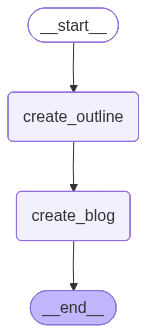

In [13]:
graph=StateGraph(BlogState)

#Add Nodes
graph.add_node("create_outline",create_outline)
graph.add_node("create_blog",create_blog)

#Add Edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_outline','create_blog')

#compile the graph
workflow=graph.compile()
workflow



In [14]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': 'Here’s a detailed, ready-to-use outline for a blog on “The Rise of AI in India.” It’s structured for depth, readability, and SEO, with suggested angles, visuals, case studies, and data placeholders you can fill in.\n\nWorking title options\n- The Rise of AI in India: How Policy, Talent, and Innovation Are Shaping a Global AI Powerhouse\n- AI in India: From #AIforAll to IndiaAI—What’s Driving the Next Tech Wave\n- Bharat’s AI Moment: Language, Infrastructure, and the New Innovation Economy\n\nTarget reader and intent\n- Audience: Tech leaders, policymakers, founders, investors, students\n- Intent: Explain India’s AI trajectory, opportunities, challenges, and next steps\n- Estimated reading time: 10–15 minutes\n\nSEO scaffolding\n- Primary keywords: AI in India, IndiaAI Mission, Bhashini, Indian AI startups, Responsible AI India\n- Secondary keywords: India Stack, DPDP Act, AI4Bharat, generative AI India, NVIDIA Reliance Tata AI\n- Meta descri

In [15]:
print(final_state['outline'])

Here’s a detailed, ready-to-use outline for a blog on “The Rise of AI in India.” It’s structured for depth, readability, and SEO, with suggested angles, visuals, case studies, and data placeholders you can fill in.

Working title options
- The Rise of AI in India: How Policy, Talent, and Innovation Are Shaping a Global AI Powerhouse
- AI in India: From #AIforAll to IndiaAI—What’s Driving the Next Tech Wave
- Bharat’s AI Moment: Language, Infrastructure, and the New Innovation Economy

Target reader and intent
- Audience: Tech leaders, policymakers, founders, investors, students
- Intent: Explain India’s AI trajectory, opportunities, challenges, and next steps
- Estimated reading time: 10–15 minutes

SEO scaffolding
- Primary keywords: AI in India, IndiaAI Mission, Bhashini, Indian AI startups, Responsible AI India
- Secondary keywords: India Stack, DPDP Act, AI4Bharat, generative AI India, NVIDIA Reliance Tata AI
- Meta description (suggested): India’s AI ecosystem is accelerating—powe

In [16]:
print(final_state['content'])

Working title options
- The Rise of AI in India: How Policy, Talent, and Innovation Are Shaping a Global AI Powerhouse
- AI in India: From #AIforAll to IndiaAI—What’s Driving the Next Tech Wave
- Bharat’s AI Moment: Language, Infrastructure, and the New Innovation Economy

Target reader and intent
- Audience: Tech leaders, policymakers, founders, investors, students
- Intent: Explain India’s AI trajectory, opportunities, challenges, and next steps
- Estimated reading time: 10–15 minutes

SEO scaffolding
- Primary keywords: AI in India, IndiaAI Mission, Bhashini, Indian AI startups, Responsible AI India
- Secondary keywords: India Stack, DPDP Act, AI4Bharat, generative AI India, NVIDIA Reliance Tata AI
- Meta description: India’s AI ecosystem is accelerating—powered by digital public infrastructure, policy moves like the IndiaAI Mission, a deep talent pool, and a surge of startups tackling multilingual and sector-specific problems. Explore the landscape, key players, use cases, and what